In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
sb.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


#import data
train = pd.read_csv('Train.csv', index_col='user_id')
#test=  pd.read_csv('Test.csv')
#submission = pd.read_csv('SampleSubmission.csv')
train.shape

(2154048, 18)

## Data exploration

(churn == 1) / (all_dataset): 18.75473527052322 %


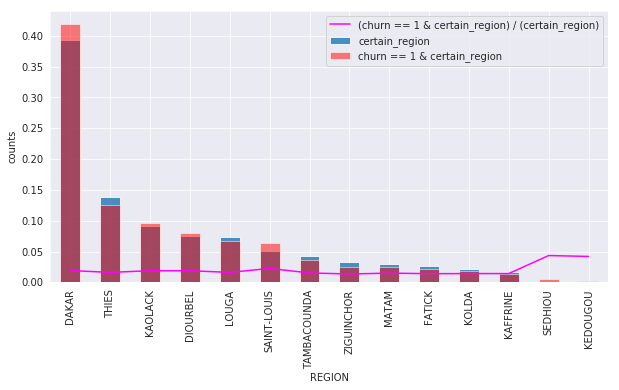

In [2]:
plt.figure(figsize=(10,5))
train['REGION'].value_counts(normalize=True).plot(kind='bar', label='certain_region', alpha=0.8)
train[train['CHURN'] == 1]['REGION'].value_counts(normalize=True).plot(kind='bar',
                                                        color='r',alpha=0.5,
                                                        label='churn == 1 & certain_region')

plt.plot(train[train['CHURN'] == 1]['REGION'].value_counts().values / \
         train['REGION'].value_counts().values, color='magenta', 
         label='(churn == 1 & certain_region) / (certain_region)')
plt.legend()
plt.ylabel('counts')
plt.xlabel('REGION')
print('(churn == 1) / (all_dataset): {} %'.format(train['CHURN'].sum() / train['CHURN'].shape[0] * 100));

(churn == 1) / (all_dataset): 18.75473527052322 %


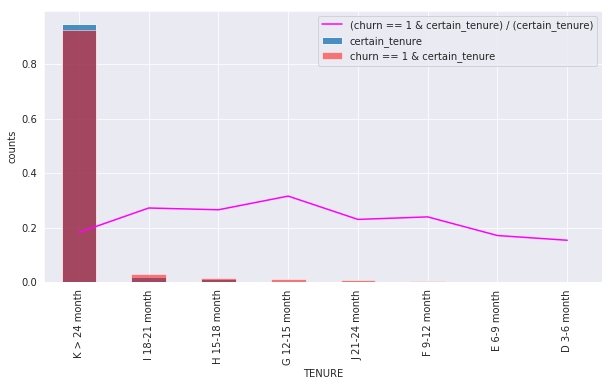

In [3]:
plt.figure(figsize=(10,5))
train['TENURE'].value_counts(normalize=True).plot(kind='bar', label='certain_tenure', alpha=0.8)
train[train['CHURN'] == 1]['TENURE'].value_counts(normalize=True).plot(kind='bar',
                                                        color='r',alpha=0.5,
                                                        label='churn == 1 & certain_tenure')

plt.plot(train[train['CHURN'] == 1]['TENURE'].value_counts().values / \
         train['TENURE'].value_counts().values, color='magenta', 
         label='(churn == 1 & certain_tenure) / (certain_tenure)')

plt.legend()
plt.ylabel('counts')
plt.xlabel('TENURE')
print('(churn == 1) / (all_dataset): {} %'.format(train['CHURN'].sum() / train['CHURN'].shape[0] * 100));

In [ ]:
'K > 24 month', 'I 18-21 month', 'H 15-18 month', 'G 12-15 month', 'J 21-24 month',
'F 9-12 month', 'E 6-9 month', 'D 3-6 month'

(churn == 1) / (all_dataset): 18.75473527052322 %


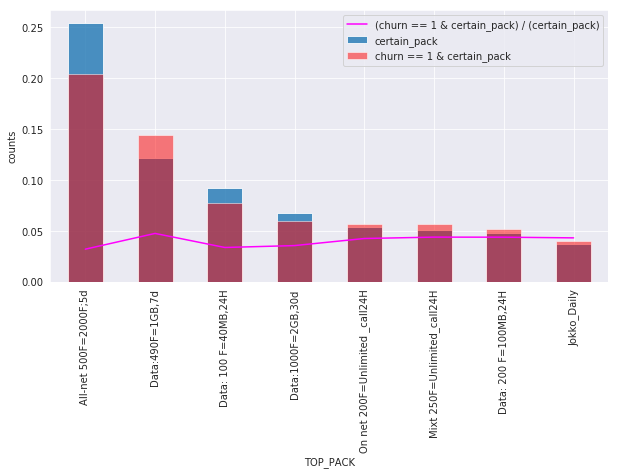

In [4]:
plt.figure(figsize=(10,5))

# смотрим на те тарифы, у которых больше 2000 пользователей
filter_array = (train['TOP_PACK'].value_counts() > 2000).values

filter_array_churn = (train[train['CHURN'] == 1]['TOP_PACK'].value_counts() > 2000).values
train['TOP_PACK'].value_counts(normalize=True)[filter_array].plot(kind='bar', 
                                                                  label='certain_pack', 
                                                                  alpha=0.8)
train[train['CHURN'] == 1]['TOP_PACK'].value_counts(normalize=True)[filter_array_churn].plot(kind='bar',
                                                        color='r',alpha=0.5,
                                                        label='churn == 1 & certain_pack')

churn_certain_pack = train[train['CHURN'] == 1]['TOP_PACK'].value_counts()[filter_array_churn].values
plt.plot(churn_certain_pack / \
         train['TOP_PACK'].value_counts()[filter_array].values[:churn_certain_pack.shape[0]], color='magenta', 
         label='(churn == 1 & certain_pack) / (certain_pack)')

plt.legend()
plt.ylabel('counts')
plt.xlabel('TOP_PACK')
print('(churn == 1) / (all_dataset): {} %'.format(train['CHURN'].sum() / train['CHURN'].shape[0] * 100))
2000 / train.shape[0] * 100;

In [5]:
# Check summary of numerical fields
#train.select_dtypes(include=['int64', 'float64']).describe().T

In [6]:
#Check for missing values in training data
#train.isnull().sum()

REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

## Preprocessing

### Work with categorical features

In [2]:
#We will drop REGION, TOP_PACK, and MRG
train.drop(columns=['REGION', 'MRG', 'TOP_PACK'], inplace=True) #drop these columns

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score

y = train['CHURN']
x = train.drop(columns=['CHURN'], axis=1)
#test = test.drop(columns=['user_id'], axis=1) #you will use this for predicting and submitting the resulting
print(x.shape)
print(y.shape)
#print(test.shape)

(2154048, 14)
(2154048,)


In [4]:
#x['TENURE'].

In [5]:
#x[x['TENURE'] == 'K > 24 month']

In [6]:
#for ten in ['K > 24 month', 'I 18-21 month', 'H 15-18 month',
#            'G 12-15 month', 'J 21-24 month', 'F 9-12 month',
#            'E 6-9 month', 'D 3-6 month']:

In [7]:
#from sklearn.preprocessing import OneHotEncoder

#tenure_ohe = OneHotEncoder(sparse=False)

#tenure_cat = pd.DataFrame(tenure_ohe.fit_transform(x[['TENURE']]))
#tenure_cat.columns = tenure_ohe.categories_[0]
#tenure_cat.index = x.index
#x = pd.concat([x, tenure_cat], axis=1)

x = x.drop(columns=['TENURE'], axis=1)

### Spliting

In [8]:
#Split training data into train and test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,
                                                 random_state=1,
                                                 shuffle=True,
                                                 stratify=y)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1507833, 13)
(1507833,)
(646215, 13)
(646215,)


In [9]:
print('whole data\n{}'.format(train['CHURN'].value_counts()))
print('train \n{}'.format(y_train.value_counts()))
print('test \n{}'.format(y_test.value_counts()))

print(train['CHURN'].value_counts()[1] / train['CHURN'].value_counts()[0],
      y_train.value_counts()[1] / y_train.value_counts()[0], 
      y_test.value_counts()[1] / y_test.value_counts()[0])

whole data
0    1750062
1     403986
Name: CHURN, dtype: int64
train 
0    1225043
1     282790
Name: CHURN, dtype: int64
test 
0    525019
1    121196
Name: CHURN, dtype: int64
0.23084096449154373 0.23084087660596403 0.23084116955767314


In [10]:
#Further split X_train and y_train into train and validation sets
X_train,X_val,y_train,y_val = train_test_split(X_train, y_train, test_size = 0.2,
                                               random_state=1,
                                               shuffle=True,
                                               stratify=y_train)

print("train")
print(X_train.shape)
print(y_train.shape)
print("+"*7)
print("test")
print(X_test.shape)
print(y_test.shape)
print("+"*7)
print("validation")
print(X_val.shape)
print(y_val.shape)

train
(1206266, 13)
(1206266,)
+++++++
test
(646215, 13)
(646215,)
+++++++
validation
(301567, 13)
(301567,)


### Work with NaNs

In [11]:
# Fill NAs for train data
# делать после разделения

columns_with_Nans = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
                     'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
                     'ZONE1', 'ZONE2', 'FREQ_TOP_PACK']

#1. MONTANT - сумма пополнения      median
#2. FREQUENCE_RECH - количество раз, когда клиент пополнял счет     0
#3. REVENUE - ежемесячный доход каждого клиента    median
#4. ARPU_SEGMENT - доход за 90 дней / 3     median
#5. FREQUENCE - количество раз, когда клиент получал доход    0
#6. DATA_VOLUME - количество подключений     0
#7. ON_NET - inter expresso call    0
#8. ORANGE - call to orange   0
#9. TIGO - call to Tigo   0
#10. ZONE1 - call to zones1    0
#11. ZONE2 - call to zones2    0
#12. REGULARITY -  количество раз, когда клиент активен в течение 90 дней     0
#13. FREQ_TOP_PACK - количество раз, когда клиент активировал top pack пакеты     0


for col in columns_with_Nans:
    if col in ['MONTANT', 'REVENUE', 'ARPU_SEGMENT']:
        X_train[col].fillna((X_train[col].median()), inplace=True)
        X_test[col].fillna((X_test[col].median()), inplace=True)
        X_val[col].fillna((X_val[col].median()), inplace=True)
    else:
        X_train[col].fillna(0, inplace=True)
        X_test[col].fillna(0, inplace=True)
        X_val[col].fillna(0, inplace=True)

### Design new features

In [12]:
# Варианты
# 1. общее число звонков
X_train['total_calls'] = X_train['ON_NET'] + X_train['ORANGE'] +\
    X_train['TIGO'] + X_train['ZONE1'] + X_train['ZONE2']

X_test['total_calls'] = X_test['ON_NET'] + X_test['ORANGE'] +\
    X_test['TIGO'] + X_test['ZONE1'] + X_test['ZONE2']

X_val['total_calls'] = X_val['ON_NET'] + X_val['ORANGE'] +\
    X_val['TIGO'] + X_val['ZONE1'] + X_val['ZONE2']


# 2. MONTANT / FREQUENCE_RECH (средняя сумма пополнения)
X_train['MONTANT/FREQUENCE_RECH']  = X_train['MONTANT'] / (X_train['FREQUENCE_RECH'] + 0.0001)
X_test['MONTANT/FREQUENCE_RECH']  = X_test['MONTANT'] / (X_test['FREQUENCE_RECH'] + 0.0001)
X_val['MONTANT/FREQUENCE_RECH']  = X_val['MONTANT'] / (X_val['FREQUENCE_RECH'] + 0.0001)


# 3. ARPU_SEGMENT * 3 - MONTANT (сколько оставалось после пополнений)
X_train['remains'] = X_train['ARPU_SEGMENT'] * 3 - X_train['MONTANT']
X_test['remains'] = X_test['ARPU_SEGMENT'] * 3 - X_test['MONTANT']
X_val['remains'] = X_val['ARPU_SEGMENT'] * 3 - X_val['MONTANT']


# 4. DATA_VOLUME / REGULARITY (плотность активности, т.е. число подкючений на число входов в сеть)
X_train['activ_density'] = X_train['DATA_VOLUME'] / (X_train['REGULARITY'] + 0.0001)
X_test['activ_density'] = X_test['DATA_VOLUME'] / (X_test['REGULARITY'] + 0.0001)
X_val['activ_density'] = X_val['DATA_VOLUME'] / (X_val['REGULARITY'] + 0.0001)


# 5. общее число звонков / REGULARITY
X_train['calls_density'] = X_train['total_calls'] / (X_train['REGULARITY'] + 0.0001)
X_test['calls_density'] = X_test['total_calls'] / (X_test['REGULARITY'] + 0.0001)
X_val['calls_density'] = X_val['total_calls'] / (X_val['REGULARITY'] + 0.0001)

# 6.
X_train['arpu_last_to_average'] = X_train['ARPU_SEGMENT'] / (X_train['REVENUE'] + 0.0001)
X_test['arpu_last_to_average'] = X_test['ARPU_SEGMENT'] / (X_test['REVENUE'] + 0.0001)
X_val['arpu_last_to_average'] = X_val['ARPU_SEGMENT'] / (X_val['REVENUE'] + 0.0001)

### Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Standardize numeric columns # 13 шт.
num_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2',
       'REGULARITY', 'FREQ_TOP_PACK', 'total_calls', 'MONTANT/FREQUENCE_RECH',
           'remains', 'activ_density', 'calls_density']

scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])

#X_train[num_cols] = min_max_scaler.fit_transform(X_train[num_cols])
#X_test[num_cols] = min_max_scaler.transform(X_test[num_cols])
#X_val[num_cols] = min_max_scaler.transform(X_val[num_cols])

### View from PCA

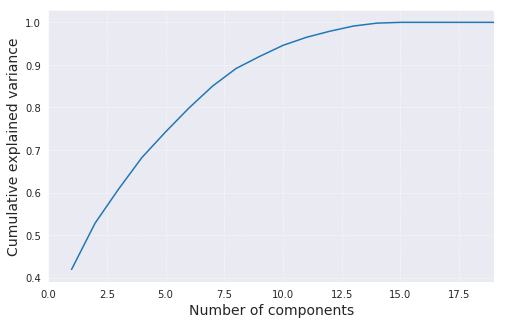

In [14]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver='full').fit(X_train.values)
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))

plt_grid = np.linspace(1, 101, 101)
ax1.plot(np.arange(X_train.shape[1]) + 1, np.cumsum(pca.explained_variance_ratio_.tolist()))

ax1.set_xlabel('Number of components', fontsize=14)
ax1.set_ylabel('Cumulative explained variance', fontsize=14)
ax1.grid(ls=':')
ax1.set_xlim(0, 19)
plt.show()

### 1. Random Forest

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_recall_curve, f1_score

from sklearn.ensemble import RandomForestClassifier

##RandomForestClassifier Model
random_forest = RandomForestClassifier(bootstrap=True,criterion = "gini",
                              n_jobs=-1,
                              max_depth=7,
                              n_estimators=200,
                              random_state=1,
                              verbose=True)

#Fit model on data
random_forest_model = random_forest.fit(X_train,y_train)

#Predict on the X_test data 
random_forest_pred = random_forest_model.predict(X_test)
random_forest_pred_proba = random_forest_model.predict_proba(X_test)[:,-1]

print("Accuracy: {}".format(accuracy_score(y_test, random_forest_pred)))
print("Recall: {}".format(recall_score(y_test, random_forest_pred)))
print("F1 Score: {}".format(f1_score(y_test, random_forest_pred)))

fpr, tpr, thresholds = roc_curve(y_test.values, random_forest_pred_proba)
print('AUC: {}'.format(auc(fpr, tpr)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.0min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    3.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    3.2s finished


Accuracy: 0.8627856054099642
Recall: 0.5956384699164989
F1 Score: 0.6195204421406749
AUC: 0.8975787933559122


### 2. Random Forest with Hyperparameter Selection using Validation Set

In [14]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_recall_curve, f1_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer



# компановка валидационной и обучающей выборки для использования GridSearch
X_train_and_val = pd.concat([X_train, X_val], axis=0)
y_train_and_val = pd.concat([y_train, y_val], axis=0)

# 0 для валидации, -1 для обучения
train_and_val_flags = np.ones(X_train_and_val.shape[0])
train_and_val_flags = -train_and_val_flags
train_and_val_flags[:X_train.shape[0]] = 0

ps = PredefinedSplit(test_fold=train_and_val_flags)


# скоринг по AUC (целевой метрике)
def AUC(y, y_pred):
    fpr, tpr, thresholds = roc_curve(y.values, y_pred)
    return auc(fpr, tpr)
auc_scorer = make_scorer(AUC)



RF_param_grid = {'n_estimators': np.linspace(150, 400, 6, dtype=int), 
                 'max_samples': np.linspace(0.4, 1, 4),
                 'max_depth': np.linspace(7, 15, 4, dtype=int)}

RF_selection_model = GridSearchCV(RandomForestClassifier(n_jobs=-1, random_state=1, verbose=True),
                             RF_param_grid, scoring=auc_scorer,
                             n_jobs=-1, refit=False, cv=ps, verbose=True)

RF_selection_model.fit(X_train_and_val, y_train_and_val)
print(RF_selection_model.best_params_, RF_selection_model.best_score_)

Fitting 1 folds for each of 96 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 73.8min finished


{'max_depth': 7, 'max_samples': 0.6, 'n_estimators': 300} 0.7414081595147528


In [15]:
#Predict on the X_test data
RF_selected_model = RandomForestClassifier(n_estimators=RF_selection_model.best_params_['n_estimators'], 
                                          max_samples=RF_selection_model.best_params_['max_samples'],
                                          max_depth=RF_selection_model.best_params_['max_depth'],
                                          n_jobs=-1, random_state=1, verbose=True)
#RF_selected_model = RandomForestClassifier(n_estimators=200, max_depth=7, n_jobs=-1, random_state=1,
#                                                         verbose=True)

RF_selected_model.fit(X_train, y_train)
RF_selected_pred = RF_selected_model.predict(X_test)
RF_selected_pred_proba = RF_selected_model.predict_proba(X_test)[:,-1]

print("Accuracy: {}".format(accuracy_score(y_test, RF_selected_pred)))
print("Recall: {}".format(recall_score(y_test, RF_selected_pred)))
print("F1 Score: {}".format(f1_score(y_test, RF_selected_pred)))

fpr, tpr, thresholds = roc_curve(y_test.values, RF_selected_pred_proba)
print('AUC: {}'.format(auc(fpr, tpr)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    4.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    4.2s finished


Accuracy: 0.8504383216112285
Recall: 0.31418528664312356
F1 Score: 0.44070484071641447
AUC: 0.8990601322636138


### 3. Take best Random Forest models

In [28]:
RF_models = pd.DataFrame(RF_selection_model.cv_results_)
RF_models.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_samples', 'param_n_estimators', 'params',
       'split0_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [42]:
from tqdm import tqdm

best_RF_probs = []
for i in tqdm(range(1, 11)):
    params = RF_models[RF_models['rank_test_score'] == i]['params'].values[0]
    RF_model = RandomForestClassifier(n_estimators=params['n_estimators'], 
                                      max_samples=params['max_samples'],
                                      max_depth=params['max_depth'],
                                      n_jobs=-1, random_state=1, verbose=True)
    RF_model.fit(X_train, y_train)
    best_RF_probs.append(RF_model.predict_proba(X_test)[:,-1])

  0%|          | 0/10 [00:00<?, ?it/s][Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.5s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    4.0s finished
 10%|█         | 1/10 [03:17<29:33, 197.02s/it][Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.0min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n

In [53]:
average_prediction_proba_RF = np.mean(np.array(best_RF_probs), axis=0)
fpr, tpr, thresholds = roc_curve(y_test.values, average_prediction_proba_RF)
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.898801781483697
